**Image Classification Using Convolutional Neural Networks(CNN)**

**Convolutional Neural Networks are useful to classify the images based on their patterns, characteristics and features**

These CNN play an important role in identifying the images in automated vehicles, recognizing people using facial patterns, etc.

**Considering the CIFAR 10 dataset for the model to classify the images and understanding their behaviours using CNN and its layers is the main objective of this project.**

In [ ]:
#@title Importing Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#@title Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of testing images: (10000, 32, 32, 3)
Shape of testing labels: (10000, 1)
Number of classes: 10


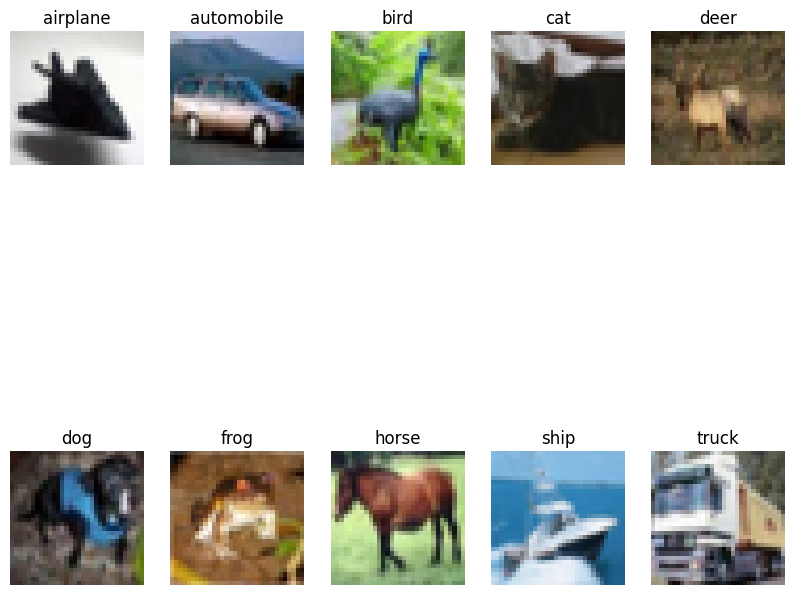

In [ ]:
#@title Explore the dataset
# Explore the shape of the dataset
print("Shape of training images:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing images:", x_test.shape)
print("Shape of testing labels:", y_test.shape)

# Explore the number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images from each class
plt.figure(figsize=(10, 10))
for i in range(num_classes):
    plt.subplot(2, 5, i + 1)
    class_indices = np.where(y_train[:, 0] == i)[0]
    sample_index = class_indices[0]
    plt.imshow(x_train[sample_index])
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [ ]:
#@title Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#@title Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))


In [ ]:
#@title Flatten the output and add Dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
#@title Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 128)        

In [ ]:
#@title Train the model
history = model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test))

Epoch 1/35
1563/1563 [==============================] - 95s 59ms/step - loss: 1.6851 - accuracy: 0.3698 - val_loss: 1.4267 - val_accuracy: 0.4637
Epoch 2/35
1563/1563 [==============================] - 91s 58ms/step - loss: 1.3009 - accuracy: 0.5296 - val_loss: 1.2106 - val_accuracy: 0.5710
Epoch 3/35
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1511 - accuracy: 0.5905 - val_loss: 1.1228 - val_accuracy: 0.5971
Epoch 4/35
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0389 - accuracy: 0.6366 - val_loss: 1.0025 - val_accuracy: 0.6511
Epoch 5/35
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9532 - accuracy: 0.6674 - val_loss: 0.9818 - val_accuracy: 0.6655
Epoch 6/35
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8939 - accuracy: 0.6899 - val_loss: 0.9237 - val_accuracy: 0.6794
Epoch 7/35
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8451 - accuracy: 0.7091 - val_loss: 0.9051 -

In [ ]:
#@title Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 6s 19ms/step - loss: 1.2119 - accuracy: 0.7117
Test accuracy: 0.7117000222206116


313/313 [==============================] - 4s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.80      0.86      0.83      1000
           2       0.61      0.59      0.60      1000
           3       0.54      0.49      0.51      1000
           4       0.63      0.74      0.68      1000
           5       0.67      0.57      0.62      1000
           6       0.77      0.79      0.78      1000
           7       0.77      0.74      0.75      1000
           8       0.80      0.82      0.81      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



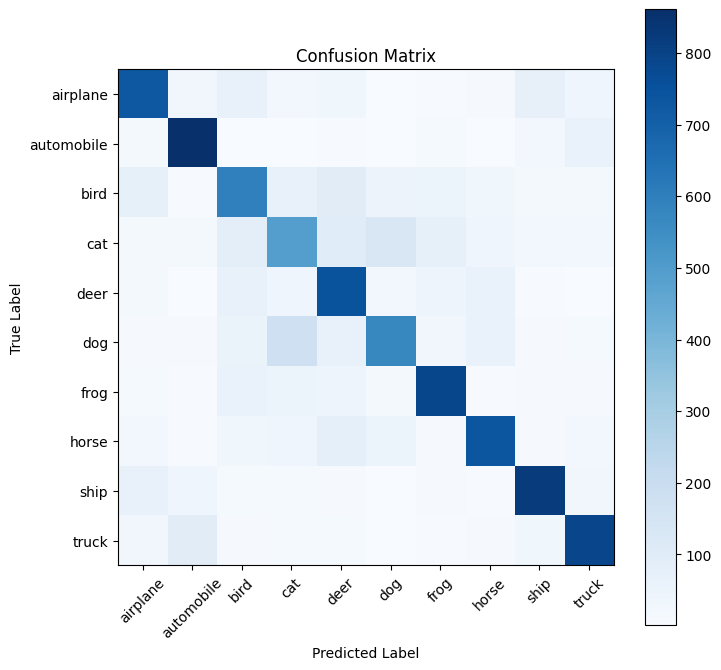

Accuracy: 0.7117
Precision: [0.72872873 0.80392157 0.60923077 0.53854626 0.62731872 0.67337278
 0.77058824 0.76507277 0.79554264 0.78742515]
Recall: [0.728 0.861 0.594 0.489 0.744 0.569 0.786 0.736 0.821 0.789]
F1 Score: [0.72836418 0.83148238 0.60151899 0.51257862 0.68069533 0.61680217
 0.77821782 0.75025484 0.80807087 0.78821179]


In [ ]:
#@title Performaning metric evaluations
# Assuming you have already trained your model and have predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = y_test.flatten()

# Compute and print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Additional metrics
accuracy = np.sum(y_pred_labels == y_test_labels) / len(y_test_labels)
precision = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


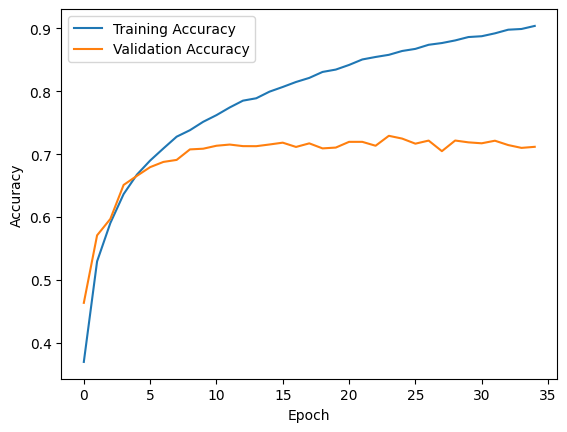

In [ ]:
#@title Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 92ms/step


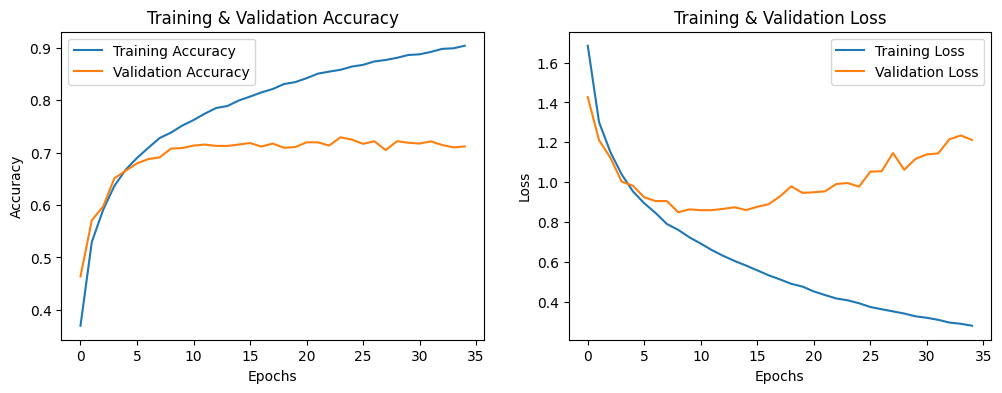

In [ ]:
# Visualize filters from convolutional layers
layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[:1])

#@title Plot training and validation loss/accuracy over epochs
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

#@title Visualizing feature maps
layer_outputs = [layer.output for layer in model.layers[:5]]  # Choose the layers for visualization
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Select a random image from the test set
img_index = np.random.randint(0, len(x_test))
test_image = x_test[img_index]

# Reshape the image to (1, 32, 32, 3) to match the model input shape
test_image = np.expand_dims(test_image, axis=0)

# Get the activations for each layer
activations = activation_model.predict(test_image)

1/1 [==============================] - 0s 123ms/step


<ipython-input-73-ec9171af9c96>:12: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


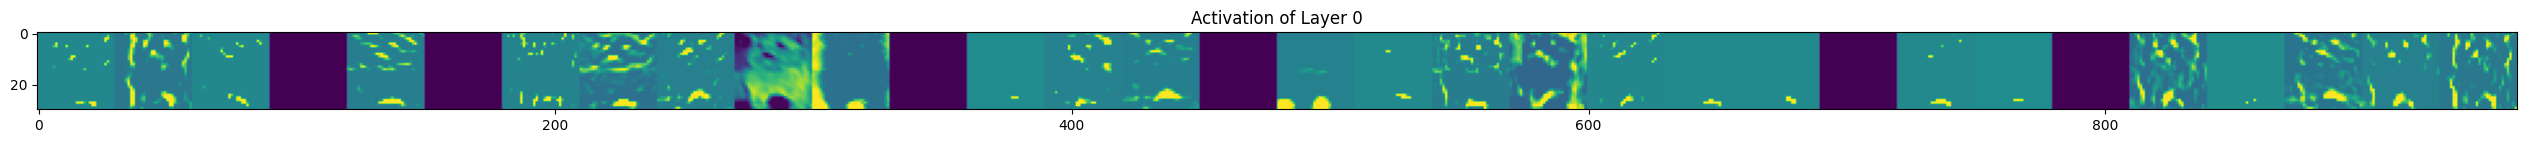

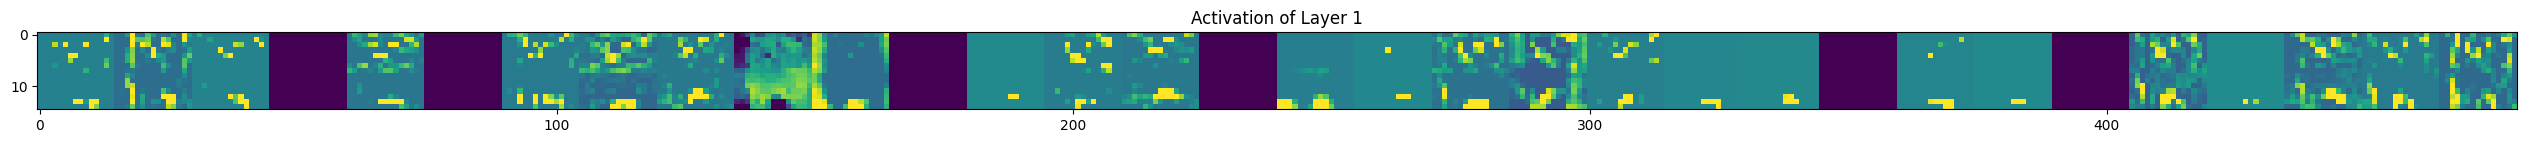

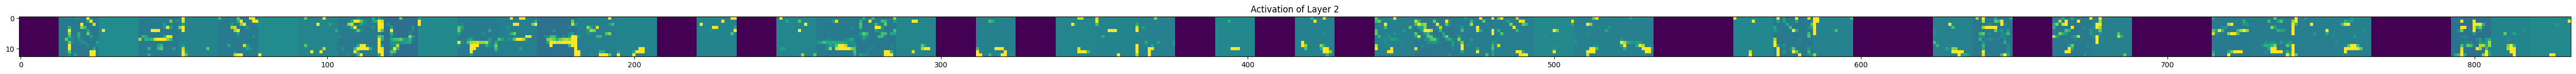

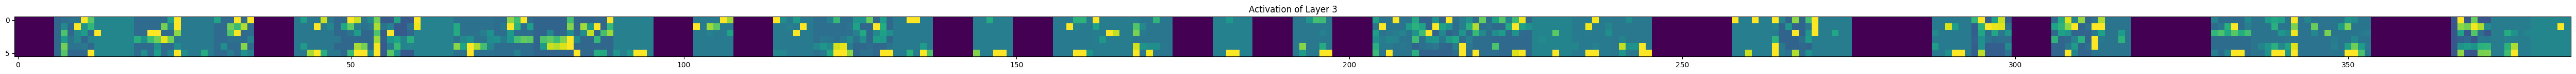

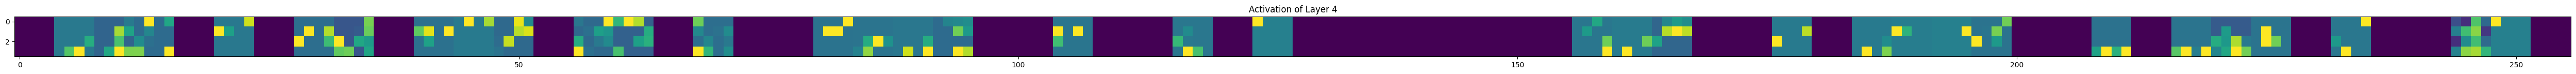

In [ ]:
#@title Visualizing feature maps for each layer
for layer_index, layer_activation in enumerate(activations):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    # Tiles the activation channels in this matrix
    display_grid = np.zeros((size, size * num_features))

    for feature_index in range(num_features):
        channel_image = layer_activation[0, :, :, feature_index]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[:, feature_index * size : (feature_index + 1) * size] = channel_image

    scale = 1.0 / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(f'Activation of Layer {layer_index}')
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

1/1 [==============================] - 0s 34ms/step


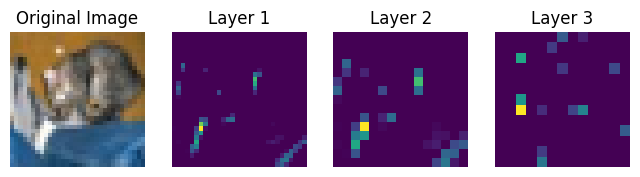

In [ ]:
# Choose a sample image
sample_image = x_test[0]
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension


#@title Get the activations of the intermediate layers for the sample image
activations = activation_model.predict(sample_image)

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, len(activations) + 1, 1)
plt.imshow(sample_image[0])
plt.title('Original Image')
plt.axis('off')

# Display the feature maps from each intermediate layer
for i, activation in enumerate(activations):
    plt.subplot(1, len(activations) + 1, i + 2)
    plt.imshow(activation[0, :, :, 0], cmap='viridis')  # Display the first channel of each feature map
    plt.title(f'Layer {i + 1}')
    plt.axis('off')

plt.show()

**Reason for choosing CNN for this dataset**

1. **Spatial Hierarchy:** CNNs are adept at capturing spatial hierarchies and local patterns in small images, making them suitable for CIFAR-10's 32x32 pixel size.

2. **Translation-Invariance:** CNNs leverage weight sharing, providing translation-invariance that allows recognizing patterns regardless of their location in the image.

3. **Reduced Parameters:** CNNs reduce parameter count through weight sharing and pooling layers, making them effective for CIFAR-10's limited dataset.

4. **Feature Hierarchy:** The architecture of CNNs, with multiple convolutional and pooling layers, creates a hierarchy of features, aiding in recognizing objects in CIFAR-10.

5. **Pre-Trained Models:** CNN architectures pre-trained on larger datasets, like ImageNet, can be fine-tuned for CIFAR-10, leveraging knowledge gained from diverse features.

**REPORT ON FINDINGS:**

* The data took a long time period to train and perform the epochs.
* More complex architecture can be used to improve model's accuracy.
* Experiment the dataset while combing CNN with other models also.
* Using appropriate data preprocessing tools are helpful for balanced data.
* More advanced approach for some topics liking adding layers, learning rates, epochs can be considered for future to make the model more efficient.
* The model reveals how each image is classified with each layer in the model.
* At first the model's accuracy was very low, but adding the layers and hyper parameter tunings, it became more better.